In [1]:
import numpy as np
import pandas as pd

In [2]:
p = pd.read_csv('preference.csv')[['ID','LID']]
l = pd.read_csv('label_entity.csv')[['LID','Label']]

In [3]:
history = pd.read_csv('history.csv')[['ID','VID']]
lr = pd.read_csv('label_relation.csv')[['LID','VID']]

In [29]:
uid = 83822
hu = history[history['ID']==83822]
lvu = lr[lr['VID'].isin(hu['VID'])]

In [30]:
hu

,ID,VID
0,83822,804101929
1,83822,973710360
2,83822,669038993
3,83822,600467059
4,83822,39195596


In [35]:
lvu.groupby('LID').size()

LID
0     1
1     1
4     1
6     1
11    1
13    1
dtype: int64

In [27]:
ids = l[l.Label.isin(['MOBA','LOL','MC','Technology'])].LID

In [40]:
group = [['MOBA','LOL','MC','Technology'],['CUHK','CUHKSZ','Student'],['Hiphop','Kpop','Gender','Hot'],['Technology','Policy','Hot']]
leng = len(group)
each = int(matrix.shape[1]/leng)

In [108]:
i = 0
for g in group:
    ids = l[l.Label.isin(g)].LID
    cols = matrix.columns[i:i+each]
    matrix.loc[ids,cols] = abs(np.random.normal(30,5,size=(len(ids),len(cols))).astype(int))
    #selct = matrix.loc[ids,matrix.columns[i:i+each]]
    #fill_selct = pd.DataFrame(np.random.normal(30,10,size=(selct.shape[0],selct.shape[1])),index=selct.index,columns=selct.columns)
    oids = l[l.LID.isin(ids)==False].LID
    matrix.loc[oids,cols] = abs(np.random.normal(5,10,size=(len(oids),len(cols))).astype(int))
    #fill_others = pd.DataFrame(np.random.normal(5,10,size=(selct.shape[0],selct.shape[1])),index=selct.index,columns=selct.columns)
    i+=each

In [117]:
matrix.sample(frac=1,axis=1)

,96029,60027,65139,688664169,12373,74322,7688,16653,71827,87536,...,88385,27473,26749,14364,87663,31367,84921,85160,48060,5750
LID,,,,,,,,,,,,,,,,,,,,,
0,2,29,11,23,7,4,1,7,7,0,...,5,31,8,0,23,17,4,1,35,1
1,21,14,0,10,11,14,4,3,3,10,...,4,19,11,14,5,3,4,12,0,1
2,7,1,8,2,8,2,1,2,1,9,...,9,12,11,2,0,9,10,2,13,6
3,1,38,36,28,4,23,32,32,9,28,...,0,9,4,26,36,36,19,0,16,38
4,1,2,30,0,4,26,28,20,16,25,...,14,7,3,31,28,34,21,9,3,23
5,2,29,8,32,9,14,8,10,5,1,...,22,6,2,9,5,10,25,7,26,9
6,21,5,11,1,2,0,0,3,24,12,...,9,29,9,14,0,18,3,9,32,14
7,2,4,11,18,22,1,4,22,1,8,...,7,22,1,3,6,6,21,20,31,0
8,33,8,9,0,35,1,6,1,32,6,...,31,7,39,0,0,16,30,33,1,0


In [68]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

D:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


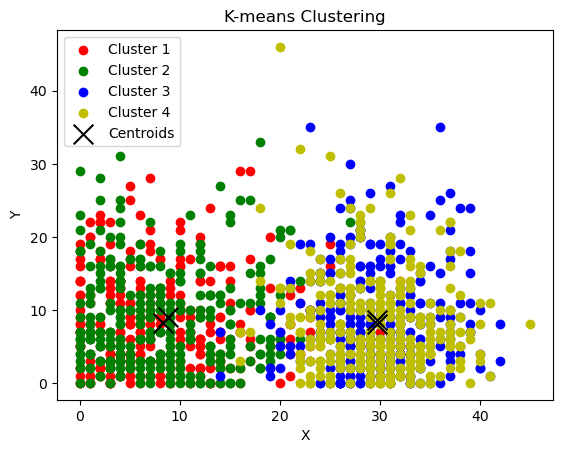

In [111]:
X=matrix.dropna(axis=1).values.T

#Compute K-Means
kmeans = KMeans(n_clusters=leng)
kmeans.fit(X)

# Result of clustering
labels = kmeans.labels_

# Centers of Clusters
centroids = kmeans.cluster_centers_

# Plot Results
colors = ['r', 'g', 'b', 'y']
for i in range(leng):
    cluster_points = X[labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[i], label=f'Cluster {i+1}')

plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, c='black', label='Centroids')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('K-means Clustering')
plt.legend()
plt.show()

In [121]:
cen = pd.DataFrame(centroids.T)
cen['Label'] = l.Label
cen[['Label',0,1,2,3]].loc[[0,2,3,4,5,6,7,8,9,10,11,12,13]]

,Label,0,1,2,3
0,Technology,8.356688,8.872611,29.636943,29.732484
2,Event,8.382166,8.659236,7.764331,7.980892
3,Hot,29.716561,7.958599,8.117834,29.751592
4,Gender,29.398089,9.321656,7.745223,8.391720
5,Policy,8.707006,8.315287,8.535032,29.283439
6,LOL,8.000000,7.831210,29.305732,8.054140
7,MOBA,7.732484,9.108280,30.047771,8.035032
8,CUHK,9.140127,29.719745,8.245223,7.598726
9,CUHKSZ,8.538217,29.235669,8.226115,7.770701
10,Student,8.477707,29.614650,8.028662,8.509554


In [128]:
v = pd.read_csv('video_entity.csv')
data = v[['Likes','No.Play']]

In [159]:
likes1 = np.random.uniform(10000, 200000, 400)
likes2 = np.random.uniform(20000, 400000, 150)
likes3 = np.random.uniform(40000,500000,12)
likes = np.concatenate((likes1, likes2,likes3))

In [199]:
play=[]
for like in likes:
    y = (like/10000)**4
    e = np.random.normal(like,like*10)
    p = y+e
    if y+e<like:
        p = y + np.random.uniform(-like,like*10)
        
    play.append(p)

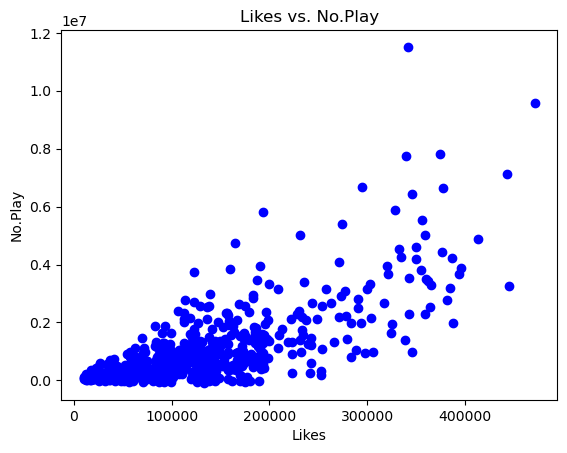

In [200]:
plt.scatter(likes, play, color='blue', marker='o')

plt.title('Likes vs. No.Play')
plt.xlabel('Likes')
plt.ylabel('No.Play')

plt.show()

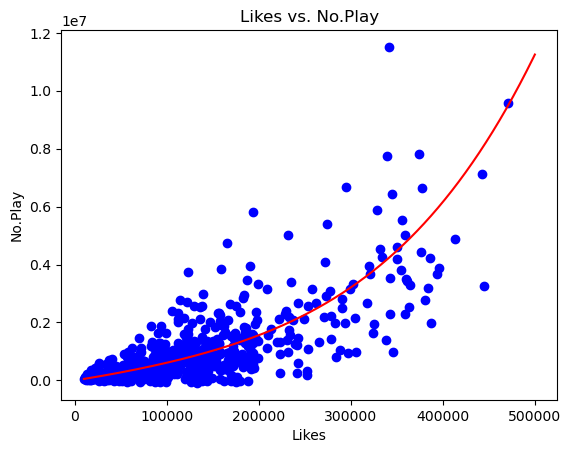

In [209]:
x = np.linspace(10000,500000,2000000)
y = (x/10000)**4+x*5+x**2/100000
plt.plot(x,y,color='red')
plt.scatter(likes, play, color='blue', marker='o')

plt.title('Likes vs. No.Play')
plt.xlabel('Likes')
plt.ylabel('No.Play')

plt.show()